In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [ ]:
import os
from dotenv import load_dotenv


os.environ["LANGSMITH_PROJECT"] = "AgenticAIworkspace"
load_dotenv()

groq_key = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_groq import ChatGroq
# Initialize the LLM
llm = ChatGroq(api_key=groq_key, model="llama-3.1-8b-instant")

In [5]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
def superbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

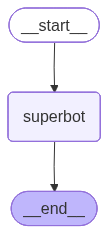

In [8]:

graph = StateGraph(State)

# node
graph.add_node('superbot', superbot)
graph.add_edge(START, "superbot")
graph.add_edge('superbot', END)

graph_builder = graph.compile(checkpointer=memory)

# display 
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
config = {"configurable": {"thread_id": "1"}}
graph_builder.invoke({"messages": "hey my name is abdullah"}, config=config)

{'messages': [HumanMessage(content='hey my name is abdullah', additional_kwargs={}, response_metadata={}, id='41d0d453-07ff-4f2d-aadc-3c5509872b34'),
  AIMessage(content='Nice to meet you, Abdullah. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 42, 'total_tokens': 65, 'completion_time': 0.022866103, 'prompt_time': 0.002348691, 'queue_time': 0.052684939, 'total_time': 0.025214794}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1ace4ee5-25c0-4bb7-87af-70ecec4861ca-0', usage_metadata={'input_tokens': 42, 'output_tokens': 23, 'total_tokens': 65})]}

#### Streaming the response with stream method

In [15]:
config = {"configurable": {"thread_id": "2"}}
for chunk in graph_builder.stream({"messages": "hey my name is abdullah"}, config=config, stream_mode="update"):
    print(chunk)

In [17]:
for chunk in graph_builder.stream({"messages": "hey my name is abdullah"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='hey my name is abdullah', additional_kwargs={}, response_metadata={}, id='ab675845-88b6-48f4-bfc0-5470a02eb9f0'), AIMessage(content='Nice to meet you, Abdullah. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 42, 'total_tokens': 65, 'completion_time': 0.022762214, 'prompt_time': 0.002175587, 'queue_time': 0.052346518, 'total_time': 0.024937801}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f55612ad-d6c5-4c73-b3ea-c35d32a01932-0', usage_metadata={'input_tokens': 42, 'output_tokens': 23, 'total_tokens': 65}), HumanMessage(content='hey my name is abdullah', additional_kwargs={}, response_metadata={}, id='13182720-3761-4747-8a57-dca374df01d1'), AIMessage(content="It looks like we've had this conversation before, Abdullah. No 

In [18]:
for chunk in graph_builder.stream({"messages": "hey my name is abdullah, i love cricket"}, config=config, stream_mode="update"):
    print(chunk)

In [19]:
for chunk in graph_builder.stream({"messages": "hey my name is abdullah, but i also like footbal"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='hey my name is abdullah', additional_kwargs={}, response_metadata={}, id='ab675845-88b6-48f4-bfc0-5470a02eb9f0'), AIMessage(content='Nice to meet you, Abdullah. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 42, 'total_tokens': 65, 'completion_time': 0.022762214, 'prompt_time': 0.002175587, 'queue_time': 0.052346518, 'total_time': 0.024937801}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f55612ad-d6c5-4c73-b3ea-c35d32a01932-0', usage_metadata={'input_tokens': 42, 'output_tokens': 23, 'total_tokens': 65}), HumanMessage(content='hey my name is abdullah', additional_kwargs={}, response_metadata={}, id='13182720-3761-4747-8a57-dca374df01d1'), AIMessage(content="It looks like we've had this conversation before, Abdullah. No 